In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import model_selection

In [2]:
##reading data with pandas
df= pd.read_csv('dataset.csv')

## Taking a peak at the data
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1237666301628060000,47.372545,0.820621,18.69254,17.13867,16.55555,16.34662,16.17639,4849,301,5,771,8168632633242440000,STAR,0.000115,7255,56597,832
1,1237673706652430000,116.303083,42.455980,18.47633,17.30546,17.24116,17.32780,17.37114,6573,301,6,220,9333948945297330000,STAR,-0.000093,8290,57364,868
2,1237671126974140000,172.756623,-8.785698,16.47714,15.31072,15.55971,15.72207,15.82471,5973,301,1,13,3221211255238850000,STAR,0.000165,2861,54583,42
3,1237665441518260000,201.224207,28.771290,18.63561,16.88346,16.09825,15.70987,15.43491,4649,301,3,121,2254061292459420000,GALAXY,0.058155,2002,53471,35
4,1237665441522840000,212.817222,26.625225,18.88325,17.87948,17.47037,17.17441,17.05235,4649,301,3,191,2390305906828010000,GALAXY,0.072210,2123,53793,74


df.shape

In [3]:
print('Nan value',df.isnull().sum())

Nan value objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64


In [4]:
df.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [5]:
df['class'].unique()

array(['STAR', 'GALAXY', 'QSO'], dtype=object)

In [6]:
df['class'].value_counts()

GALAXY    51323
STAR      38096
QSO       10581
Name: class, dtype: int64

In [7]:
df_features = df.drop(columns=['objid', 'ra','dec', 'run', 'rerun', 'camcol', 'field','specobjid', 'plate', 'mjd', 'fiberid'])
df_features

,u,g,r,i,z,class,redshift
0,18.69254,17.13867,16.55555,16.34662,16.17639,STAR,0.000115
1,18.47633,17.30546,17.24116,17.32780,17.37114,STAR,-0.000093
2,16.47714,15.31072,15.55971,15.72207,15.82471,STAR,0.000165
3,18.63561,16.88346,16.09825,15.70987,15.43491,GALAXY,0.058155
4,18.88325,17.87948,17.47037,17.17441,17.05235,GALAXY,0.072210
...,...,...,...,...,...,...,...
99995,19.32631,18.82748,18.65659,18.60481,18.60917,QSO,0.438182
99996,18.33687,17.30365,17.16037,17.14895,17.14419,STAR,-0.000497
99997,17.50690,15.63152,15.22328,15.04469,15.28668,GALAXY,0.004587
99998,19.33946,17.21436,16.29697,15.86745,15.51556,GALAXY,0.084538


Le dataset se compose majoritairement de galaxies et d'étoiles, petite quantité de quasars. 

## features description : 
objid = Object Identifier

ra = J2000 Right Ascension (r-band)

dec = J2000 Declination (r-band)

u = better of deV/Exp magnitude fit (u-band)

g = better of deV/Exp magnitude fit (g-band)

r = better of deV/Exp magnitude fit (r-band)

i = better of deV/Exp magnitude fit (i-band)

z = better of deV/Exp magnitude fit (z-band)

run = Run Number

rerun = Rerun Number

camcol = Camera column

field = Field number

specobjid = Object Identifier

class = object class (galaxy, star or quasar object)

redshift = Final Redshift

plate = plate number

mjd = MJD of observation

fiberid = fiberID



#### remarques : 
"Objid" et "Specobjid" sont obtenu avec camcol, field, mjd, plate, fiberid, run et reerun. On les a eu grâce à une jointure de tables , voir sur kaggle explication. 
Ces features servent à décrire les images prises et n'apportent rien à la description de l'objet en lui même donc on peut s'en passer non? car on s'interesse qu'aux caracteristique photométriques/spectrales des objets

du coup il restera comme features : u, g,r,i,z et redshift


In [8]:
df_features = df.drop(columns=['objid', 'ra','dec', 'run', 'rerun', 'camcol', 'field','specobjid', 'plate', 'mjd', 'fiberid'])
df_features

,u,g,r,i,z,class,redshift
0,18.69254,17.13867,16.55555,16.34662,16.17639,STAR,0.000115
1,18.47633,17.30546,17.24116,17.32780,17.37114,STAR,-0.000093
2,16.47714,15.31072,15.55971,15.72207,15.82471,STAR,0.000165
3,18.63561,16.88346,16.09825,15.70987,15.43491,GALAXY,0.058155
4,18.88325,17.87948,17.47037,17.17441,17.05235,GALAXY,0.072210
...,...,...,...,...,...,...,...
99995,19.32631,18.82748,18.65659,18.60481,18.60917,QSO,0.438182
99996,18.33687,17.30365,17.16037,17.14895,17.14419,STAR,-0.000497
99997,17.50690,15.63152,15.22328,15.04469,15.28668,GALAXY,0.004587
99998,19.33946,17.21436,16.29697,15.86745,15.51556,GALAXY,0.084538


In [9]:
df_features.describe()

,u,g,r,i,z,redshift
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,18.637915,17.407128,16.881676,16.625534,16.467087,0.170621
std,0.832284,0.985921,1.133337,1.209532,1.281788,0.437571
min,10.611810,9.668339,9.005167,8.848403,8.947795,-0.004136
25%,18.212902,16.852982,16.196608,15.865275,15.619960,0.000001
50%,18.873250,17.515860,16.890640,16.599885,16.428385,0.045997
75%,19.273302,18.056060,17.585750,17.344912,17.234625,0.095429
max,19.599950,19.996050,31.990100,32.141470,29.383740,7.011245


In [10]:
## Encoder les classes 
# On utilisera l'encoder de scikit-learn
le = preprocessing.LabelEncoder()
labels = le.fit_transform(df_features["class"])

In [11]:
df_features["class"] = labels

In [12]:
## Standarisation
# On utilisera la standarisation de scikit-learn
df_features = df_features.drop(columns=["class"])
scaler = preprocessing.StandardScaler()
scaled_features = scaler.fit_transform(df_features)
scaled_features

array([[ 0.06563335, -0.27229321, -0.2877591 , -0.23059775, -0.22679103,
        -0.38966862],
       [-0.19414721, -0.10312061,  0.31719185,  0.58061255,  0.70530996,
        -0.39014263],
       [-2.59621319, -2.12635553, -1.16644284, -0.74695702, -0.50115912,
        -0.38955451],
       ...,
       [-1.35893636, -1.80097289, -1.4632933 , -1.30699456, -0.92091078,
        -0.37944848],
       [ 0.84292041, -0.19552198, -0.51591829, -0.62676118, -0.74234683,
        -0.19673194],
       [-0.6250602 , -0.55211417, -0.50391827, -0.4544871 , -0.40574506,
        -0.390124  ]])

In [13]:
scaled_features.shape

(100000, 6)

In [14]:
df_features.columns

Index(['u', 'g', 'r', 'i', 'z', 'redshift'], dtype='object')

In [15]:
# Convert numpy array to panda dataframe
df_temp = pd.DataFrame(scaled_features, columns=df_features.columns)
df_temp

,u,g,r,i,z,redshift
0,0.065633,-0.272293,-0.287759,-0.230598,-0.226791,-0.389669
1,-0.194147,-0.103121,0.317192,0.580613,0.705310,-0.390143
2,-2.596213,-2.126356,-1.166443,-0.746957,-0.501159,-0.389555
3,-0.002769,-0.531149,-0.691260,-0.757044,-0.805267,-0.257025
4,0.294775,0.479099,0.519436,0.453794,0.456601,-0.224904
...,...,...,...,...,...,...
99995,0.827120,1.440641,1.566103,1.636406,1.671176,0.611473
99996,-0.361711,-0.104956,0.245906,0.432745,0.528252,-0.391067
99997,-1.358936,-1.800973,-1.463293,-1.306995,-0.920911,-0.379448
99998,0.842920,-0.195522,-0.515918,-0.626761,-0.742347,-0.196732


In [16]:
# Décomposition de notre jeu de données en ensemble d'entrainement+validation et en un ensemble de test 
test_ratio = 0.2
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(df_temp, labels, test_size = test_ratio)

In [17]:
# Modele bayesien fait à la main 
class BayesienNaif_Gaussian:
    def __init__(self,K): ## instanciation d'un objet du type de la classe.
        self.K = K
        self.N = 0
        self.D = 0
    
    def fit(self, X, y):
        N = X.shape[0]
        D = X.shape[1]
        K = self.K
        self.mkd = np.zeros((K,D))
        self.skd = np.zeros((K,D))
        self.Pk = np.zeros(K)

        for k in range(0,K):
            numerateurMoy = np.sum(X[y==k], axis=0)
            denominateur = (y==k).sum()
            self.mkd[k,:] = numerateurMoy[:] / denominateur # vecteur de taille D

            numerateurSig = np.sum(np.subtract(X[y==k], self.mkd[k,:])**2, axis=0) 

            self.skd[k,:] = numerateurSig[:] / denominateur # vecteur de taille D

            self.Pk[k] = denominateur/N
        return self
    
    def predict_proba(self, X):
        N = X.shape[0]
        pi = 3.14159265
        eps = 1e-8
        K = self.K
        ypreds = np.zeros((K, N))

        for k in range (K):
            num = -np.subtract(X, self.mkd[k])**2
            denominateur = (eps + (2*(self.skd[k])))

            terme1 = num/denominateur        # vecteur de taille D
            terme2 = np.log(1./(eps + np.sqrt(2*pi*(self.skd[k]))))   # vecteur de taille D
            
            #Somme sur D
            ypreds[k] = np.sum(np.add (terme1, terme2), axis=1)\
                        + np.log(self.Pk[k])
        return ypreds
    
    def predict(self, X):
        y_proba = self.predict_proba(X)
        y_pred = np.argmax(y_proba, axis=0)
        return y_pred
    

In [18]:
model = BayesienNaif_Gaussian(3)
model.fit(X_train, Y_train)
ypred_test = model.predict(X_test)

#Calcule du score sur test
score = 1 - (ypred_test - Y_test != 0 ).mean()
score

0.9756

In [19]:
##Autres Algos pour comparer Sans optimisation des hyper param

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate
model_name = ["Nearest Neighbors",
     "Decision Tree", "Random Forest", 
     "Naive Bayes"]
model_list = [
    KNeighborsClassifier(3),
    DecisionTreeClassifier(max_depth=10),
    RandomForestClassifier(max_depth=10, n_estimators=20),
    GaussianNB()
    ]

s_train = []
s_test = []
for i in range(len(model_list)):
    s_prime = cross_validate(model_list[i], X_train, Y_train,cv=5, scoring='roc_auc_ovo', return_train_score=True)
    s_train.append(s_prime['train_score'].mean())
    s_test.append(s_prime['test_score'].mean())
    d = {'Score_train': s_train, 
            'Score_test': s_test} 

In [20]:
s_test

[0.9854514676006833,
 0.9905613874727758,
 0.9962530551935942,
 0.9832711321061058]

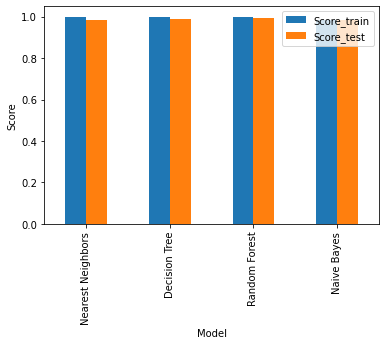

In [21]:
#Plot
sd = pd.DataFrame(d, index=[model_name[i] for i in range(len(model_name))] ) 
ax = sd.plot.bar()
ax.set_ylabel("Score")
ax.set_xlabel("Model")
plt.show()